In [28]:
# import tensorflow as tf 
import pandas as pd 
import numpy as np 
from scipy.optimize import curve_fit, basinhopping 
import matplotlib.pyplot as plt
import _thread as th
%matplotlib inline 


LPPL  

E[ln p(t)] = A + B(tc -t)^m + (C*(tc-t)^m)*cos(omega*ln(tc-t) - phi) 

The LPPL model is described by 3 linear parameters (A,B,C) and 4 nonlinear parameters
(m, omega, tc, phee). These parameters are subjected to the following constrains. Since the
integral of the hazard rate  over time up to t = tc gives the probability of the occurrence
of a crash, it should be bounded by 1, which yields the condition m < 1. At the same time,
the log-price  should also remain finite for any t ≤ tc, which imply the other condition
m > 0. In addition, the requirement of the existence of an acceleration of the hazard rate as
time converges towards tc implies B < 0. Additional constraints emerge from a compilation
of a significant number of historical bubbles that can be summarized as follows:
    
        0.1 ≤ m ≤ 0.9, 6 ≤ omega ≤ 13, |C| < 1, B < 0.


In [29]:
# Log periodic function, as per https://arxiv.org/abs/cond-mat/0201458v1
def y(x, o, m, A, B, C, tau):
    ''' Target Log-Periodic Power Law (LPPL) function
        Note: Scaled 'B' -> -1.0
        TODO: Perhaps we should check that parameters passed result in
              reasonable computations
    '''
    ret = A + B*tau**m * x**m + C * tau**m * x**m * np.cos(o * np.log(x))
    return ret

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


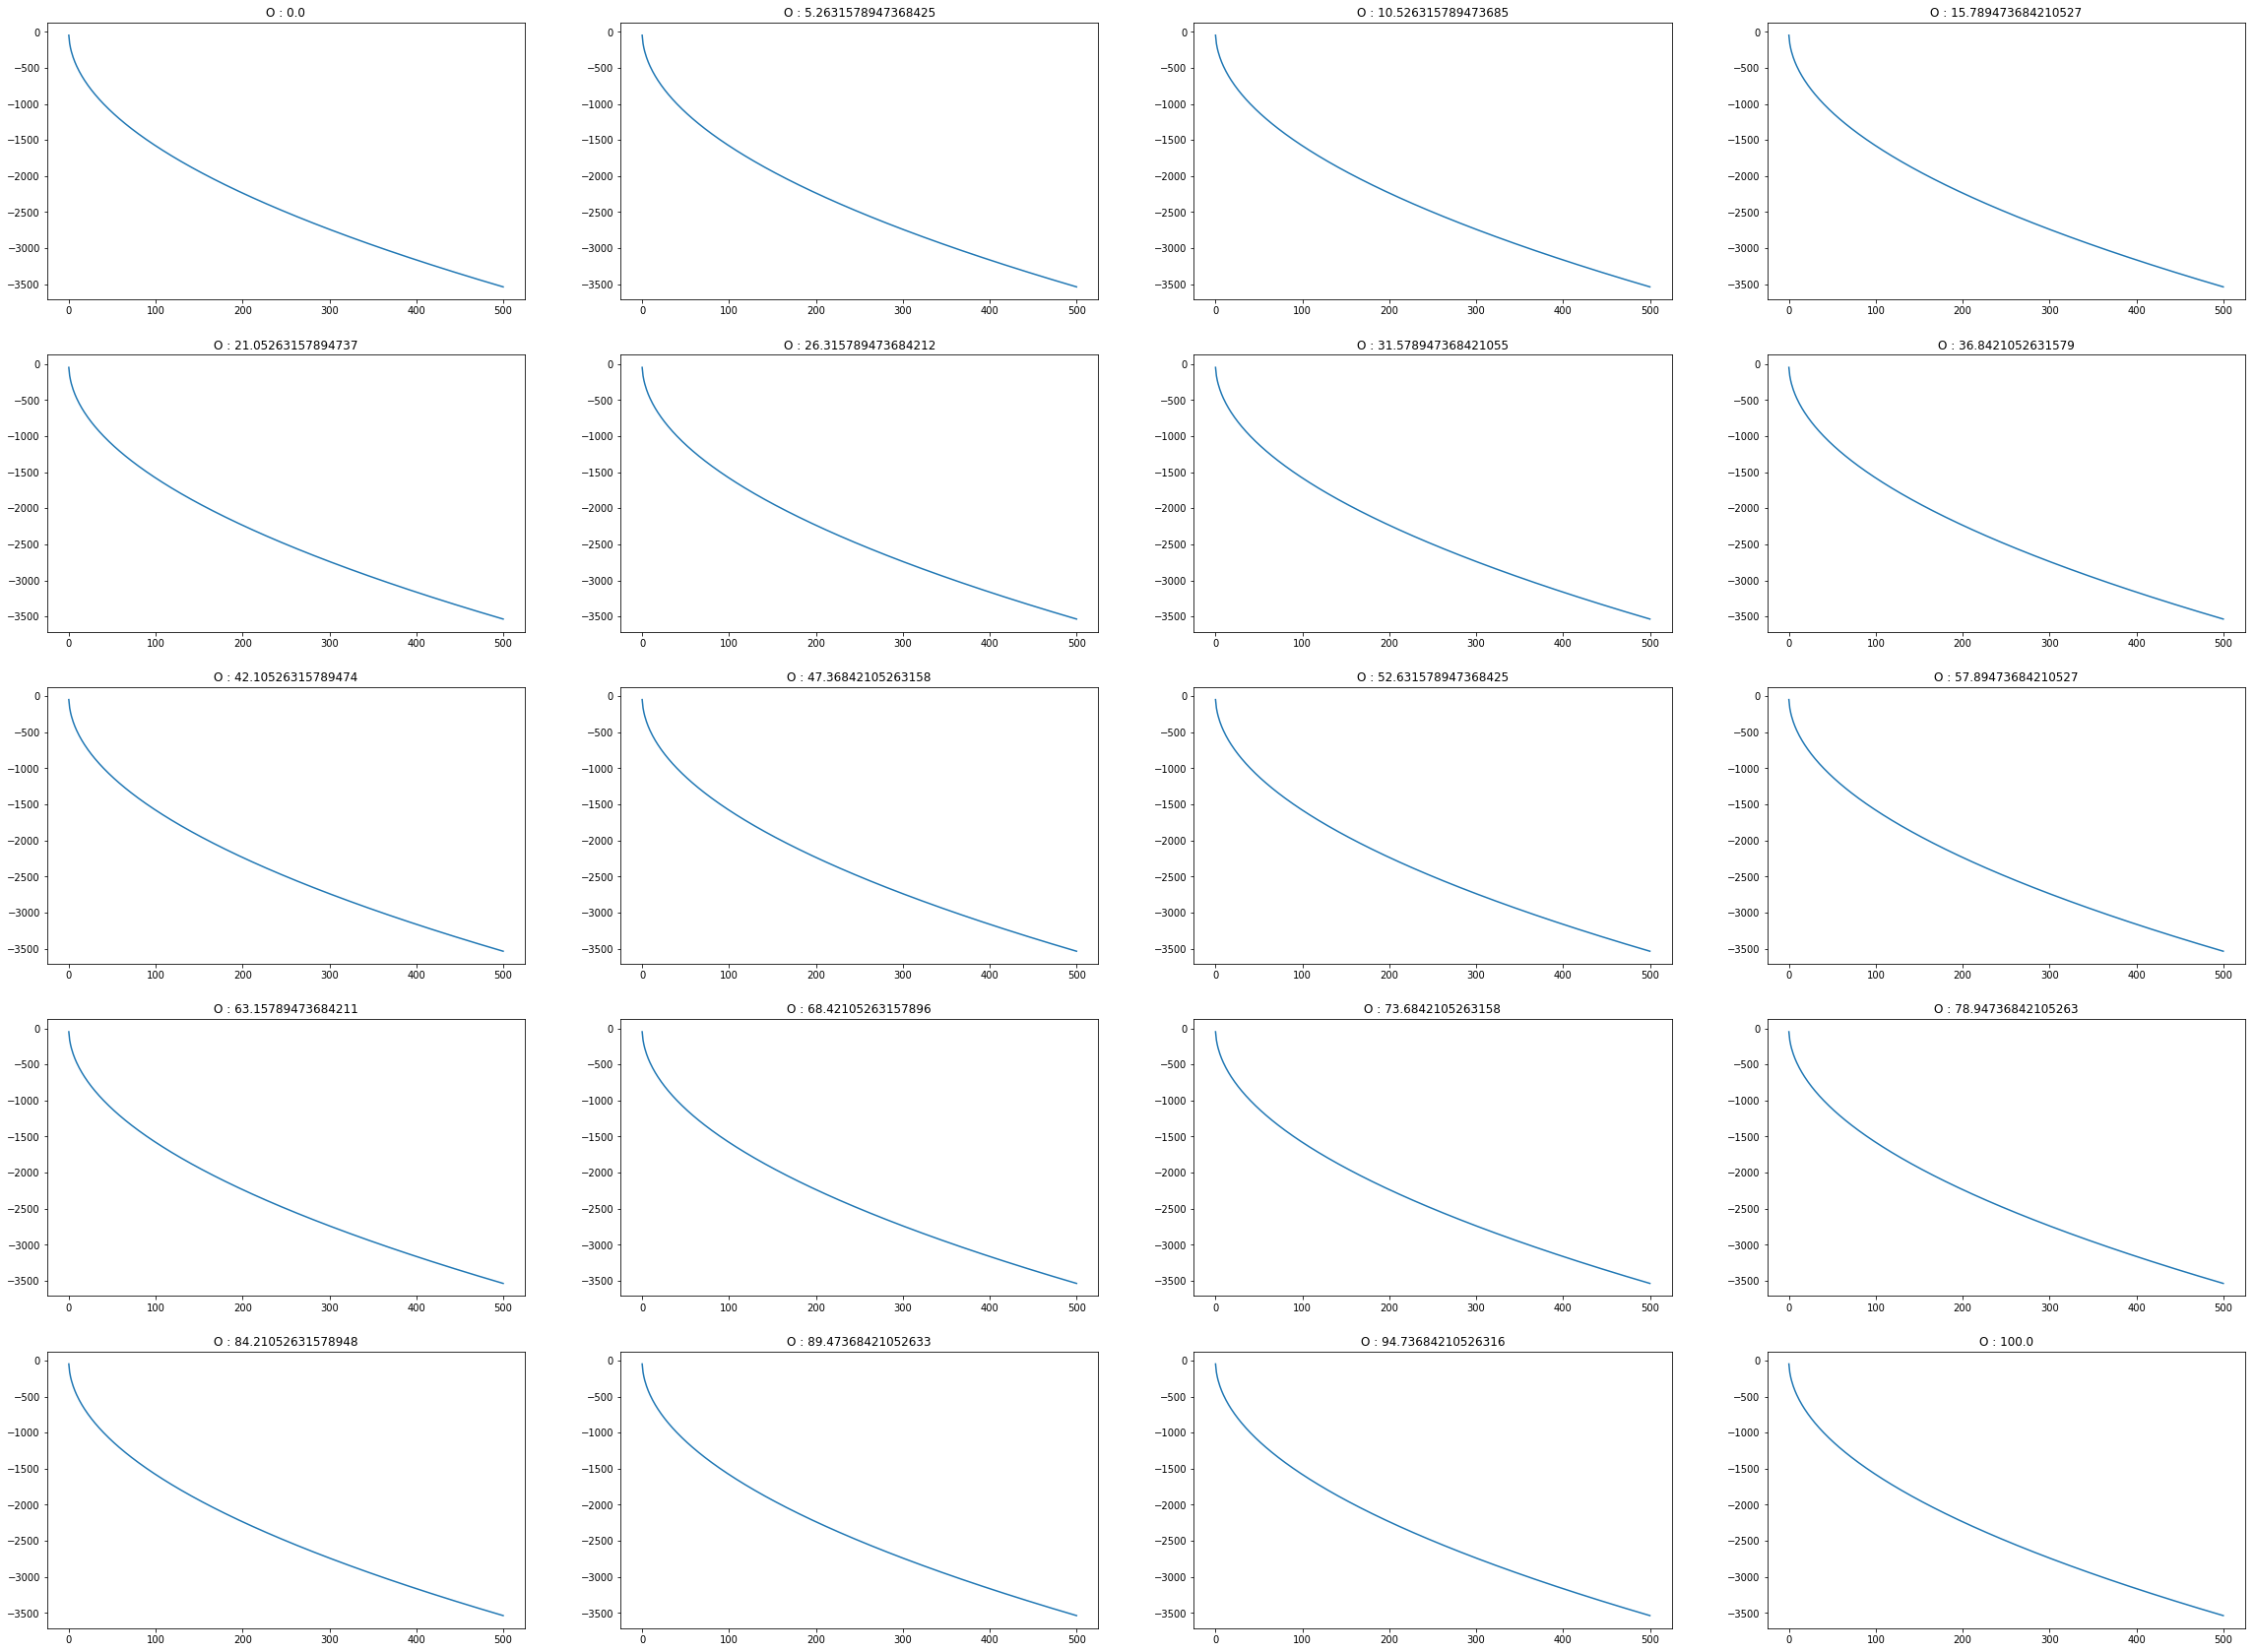

In [101]:
n_point = 500
xd = np.linspace(0.1, n_point, n_point)

n_iter = 20 
od = np.linspace(0, 100, n_iter)
md = np.linspace(0.1,0.9, n_iter)
A = 3 
Bd = np.linspace(-100, -0.1, n_iter)
Cd = np.linspace(-1, 1, n_iter)
taud = np.linspace(0, 20, n_iter)


nrows, ncols = 5, 4
n_pic = 1
plt.figure(figsize=(40,30))
plt.subplot(nrows, ncols, n_pic)
for o in od:
    mo, Bo, Co, tauo = np.mean(md), np.mean(Bd), np.mean(Cd), np.mean(taud)
    yd = y(xd, o, mo, A, Bo, Co, tauo)
    plt.subplot(nrows, ncols, n_pic)
    plt.title("O : " + str(o))
    plt.plot(xd, yd)
    n_pic += 1 


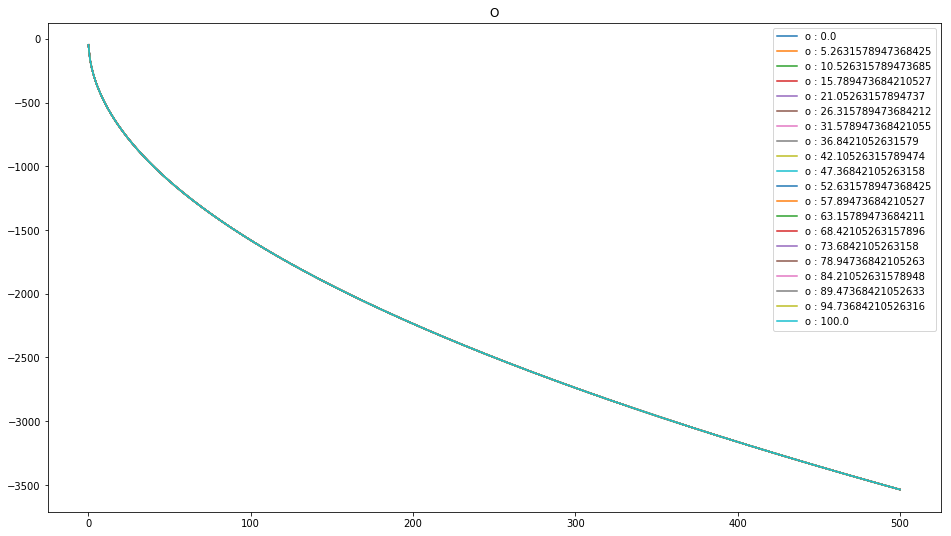

In [102]:
plt.figure(figsize=(16,9))
plt.title("O")
for o in od:
    mo, Bo, Co, tauo = np.mean(md), np.mean(Bd), np.mean(Cd), np.mean(taud)
    yd = y(xd, o, mo, A, Bo, Co, tauo)
    plt.plot(xd, yd, label='o : '+str(o))
plt.legend()

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


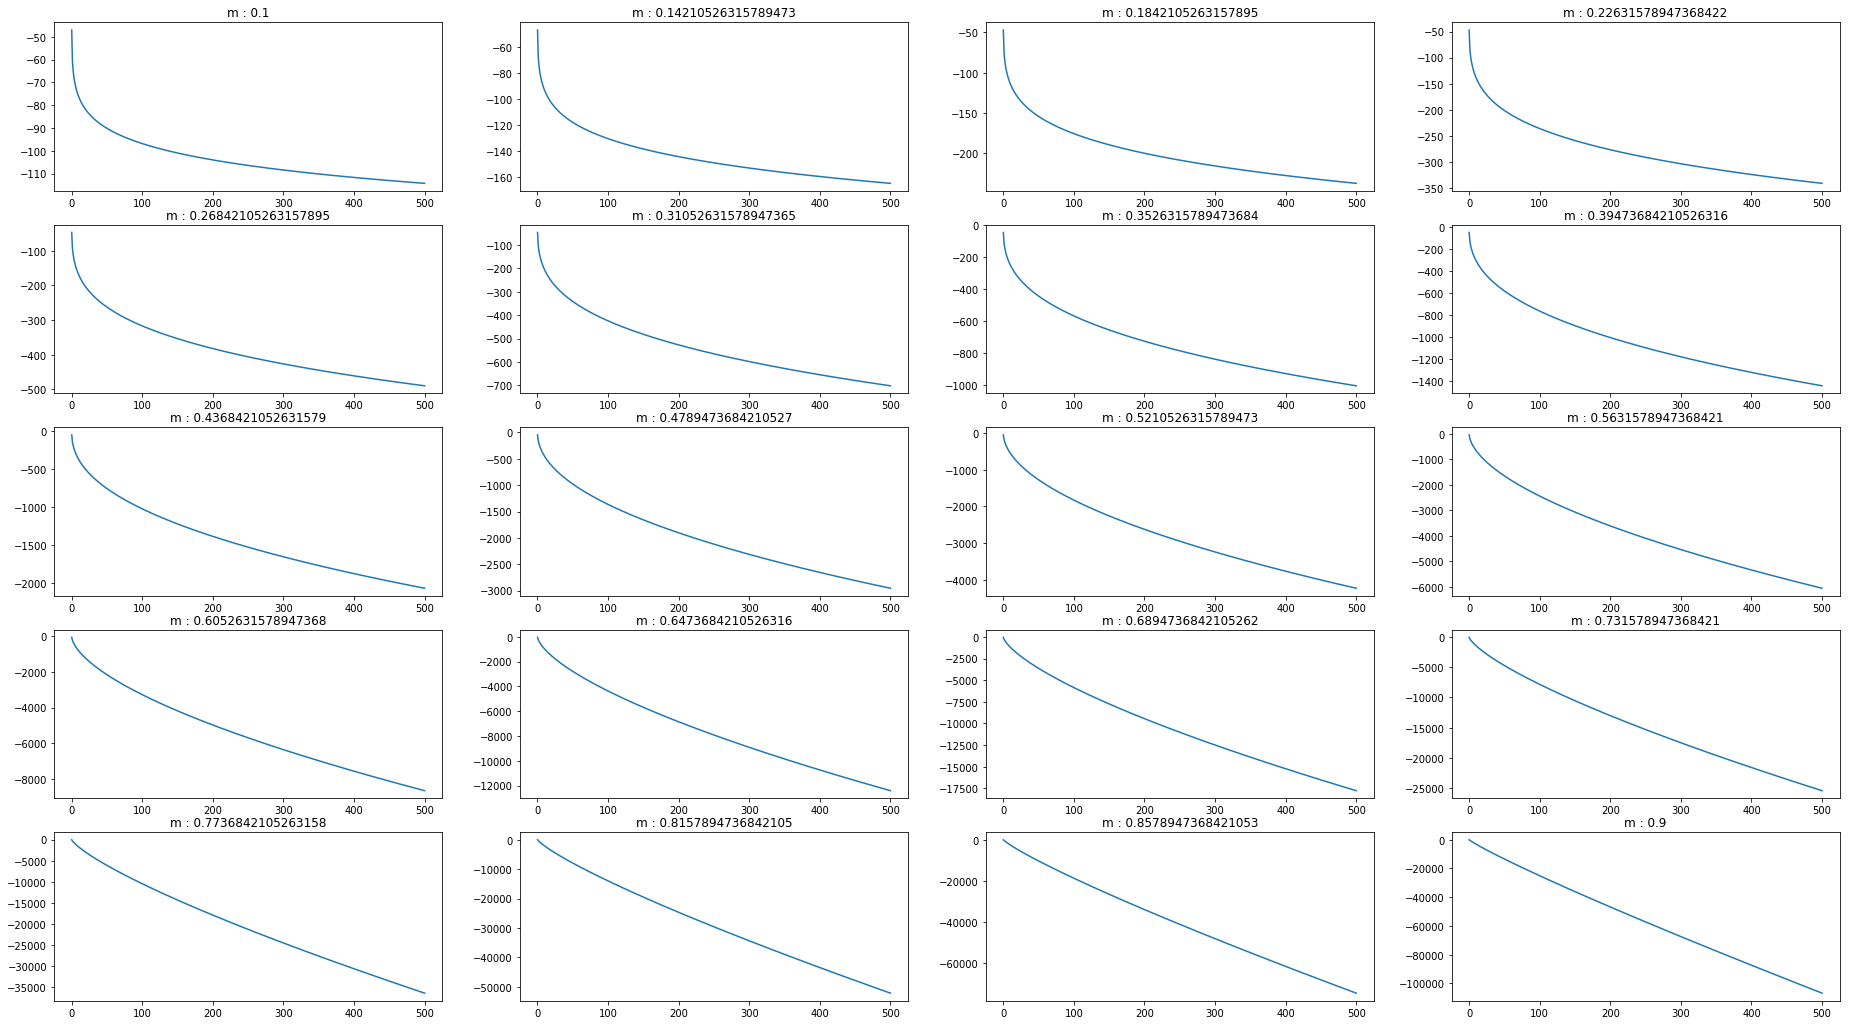

In [103]:
nrows, ncols = 5, 4
n_pic = 1
plt.figure(figsize=(32,18))
plt.subplot(nrows, ncols, n_pic)
for m in md:
    om, Bm, Cm, taum = np.mean(od), np.mean(Bd), np.mean(Cd), np.mean(taud)
    yd = y(xd, om, m, A, Bo, Co, tauo)
    plt.subplot(nrows, ncols, n_pic)
    plt.title("m : " + str(m))
    plt.plot(xd, yd)
    n_pic += 1 

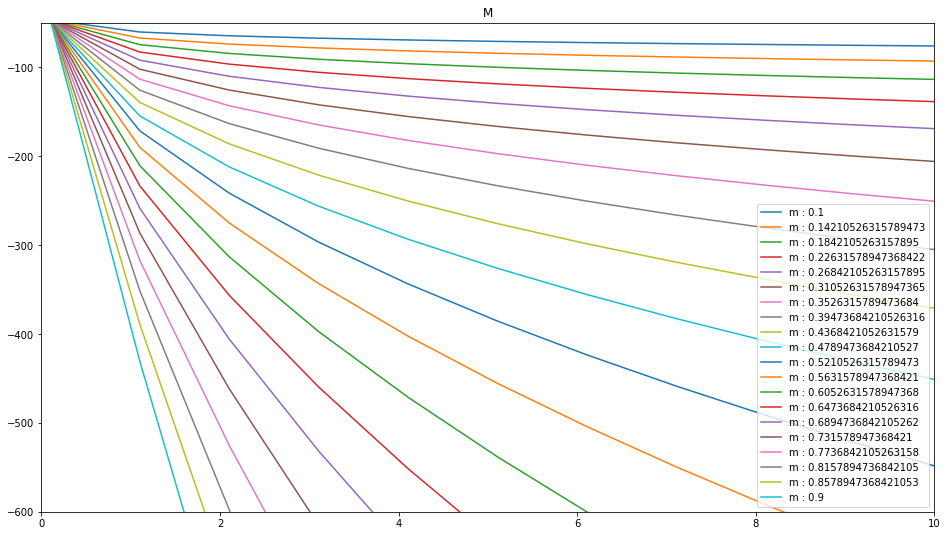

In [104]:
plt.figure(figsize=(16,9))
plt.title("M")
for m in md:
    om, Bm, Cm, taum = np.mean(od), np.mean(Bd), np.mean(Cd), np.mean(taud)
    yd = y(xd, om, m, A, Bo, Co, tauo)
    plt.plot(xd, yd, label='m : '+str(m))
plt.xlim(0,10)
plt.ylim(-600,-50)
plt.legend()

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


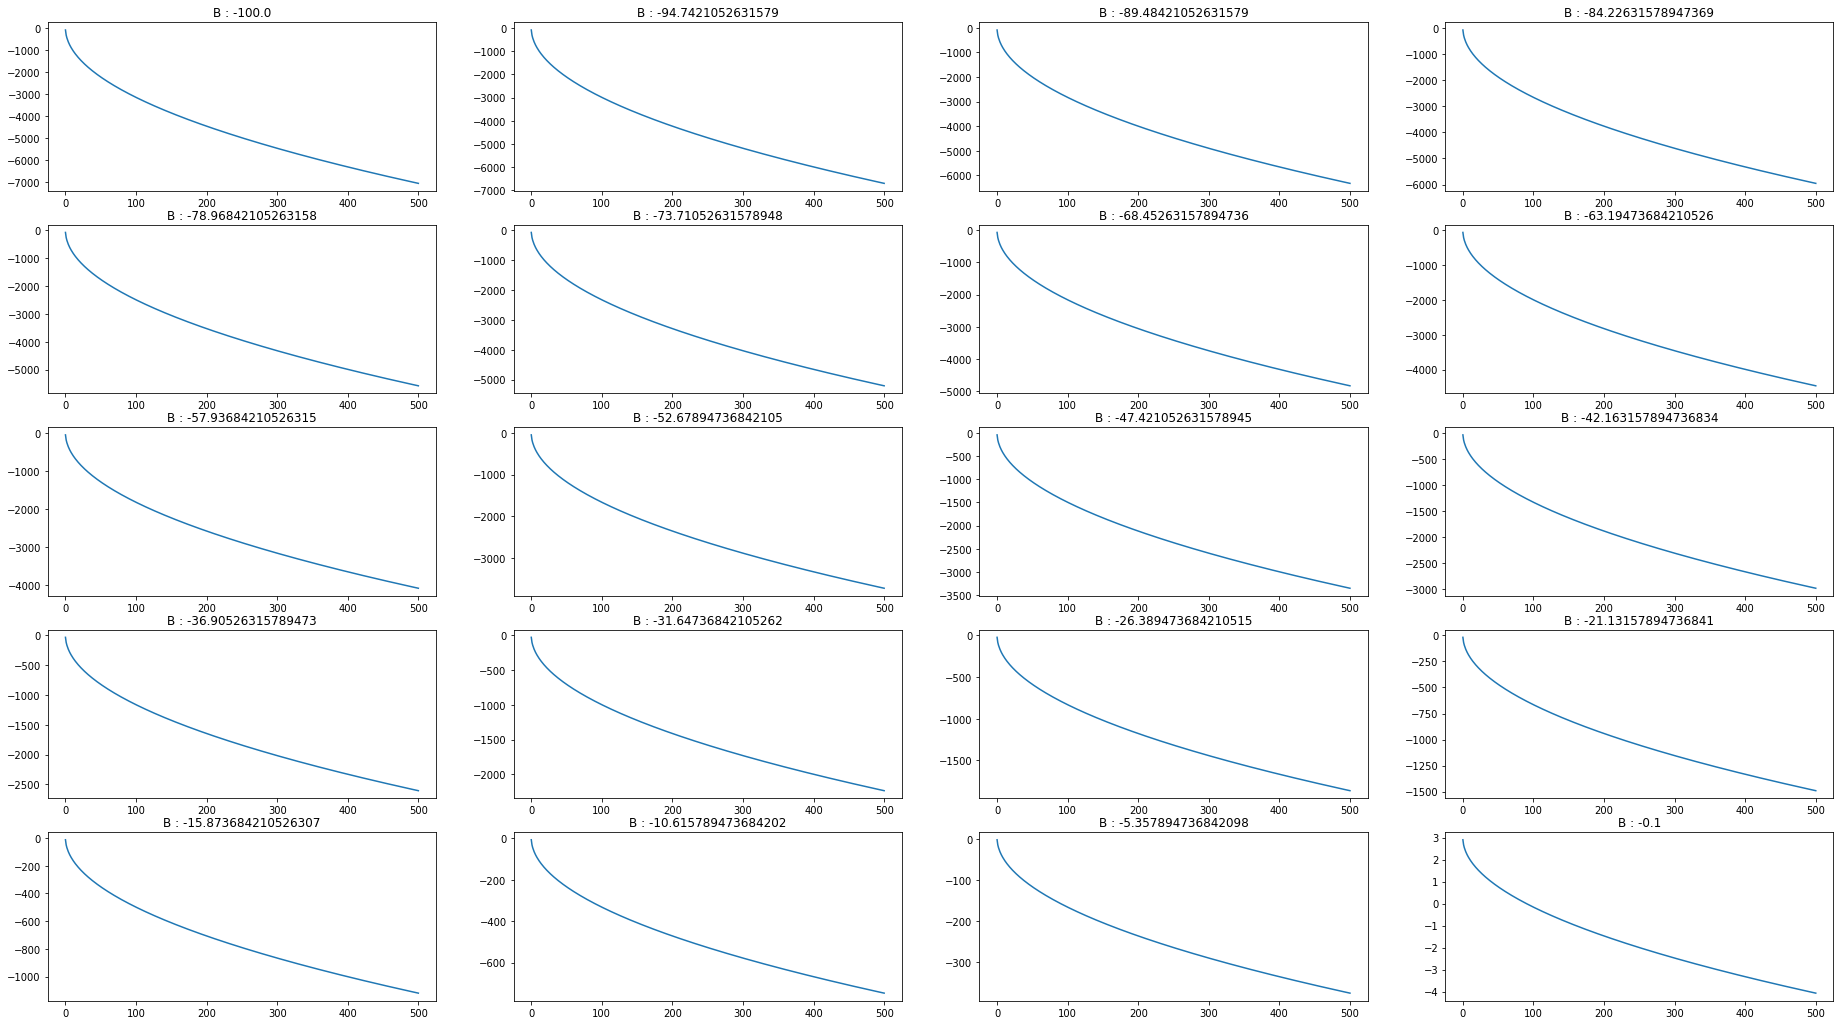

In [105]:
nrows, ncols = 5, 4
n_pic = 1
plt.figure(figsize=(32,18))
plt.subplot(nrows, ncols, n_pic)
for B in Bd:
    oB, mB, CB, tauB = np.mean(od), np.mean(md), np.mean(Cd), np.mean(taud)
    yd = y(xd, oB, mB, A, B, CB, tauB)
    plt.subplot(nrows, ncols, n_pic)
    plt.title("B : " + str(B))
    plt.plot(xd, yd)
    n_pic += 1 

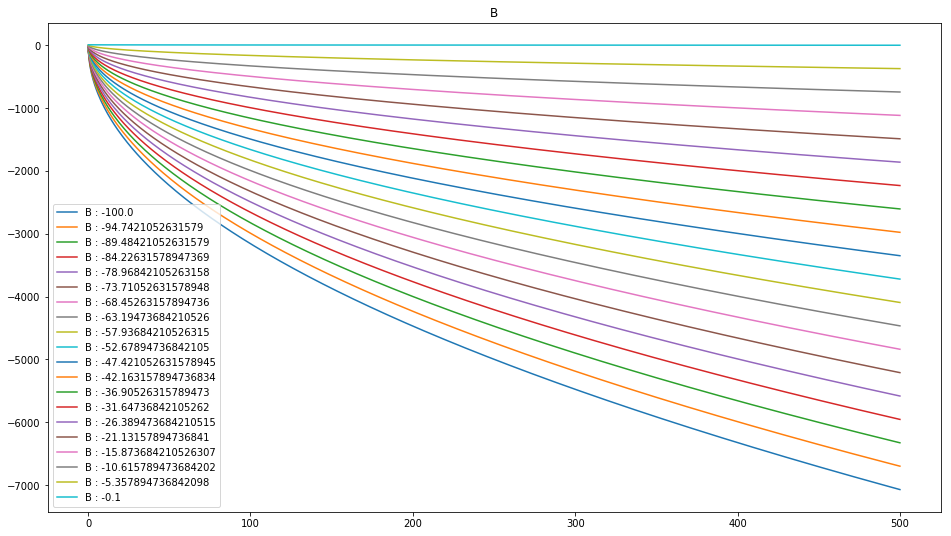

In [106]:
plt.figure(figsize=(16,9))
plt.title("B")
for B in Bd:
    oB, mB, CB, tauB = np.mean(od), np.mean(md), np.mean(Cd), np.mean(taud)
    yd = y(xd, oB, mB, A, B, CB, tauB)
    plt.plot(xd, yd, label='B : '+str(B))
# plt.xlim(0,100)
# plt.ylim(-800,-50)
plt.legend()

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


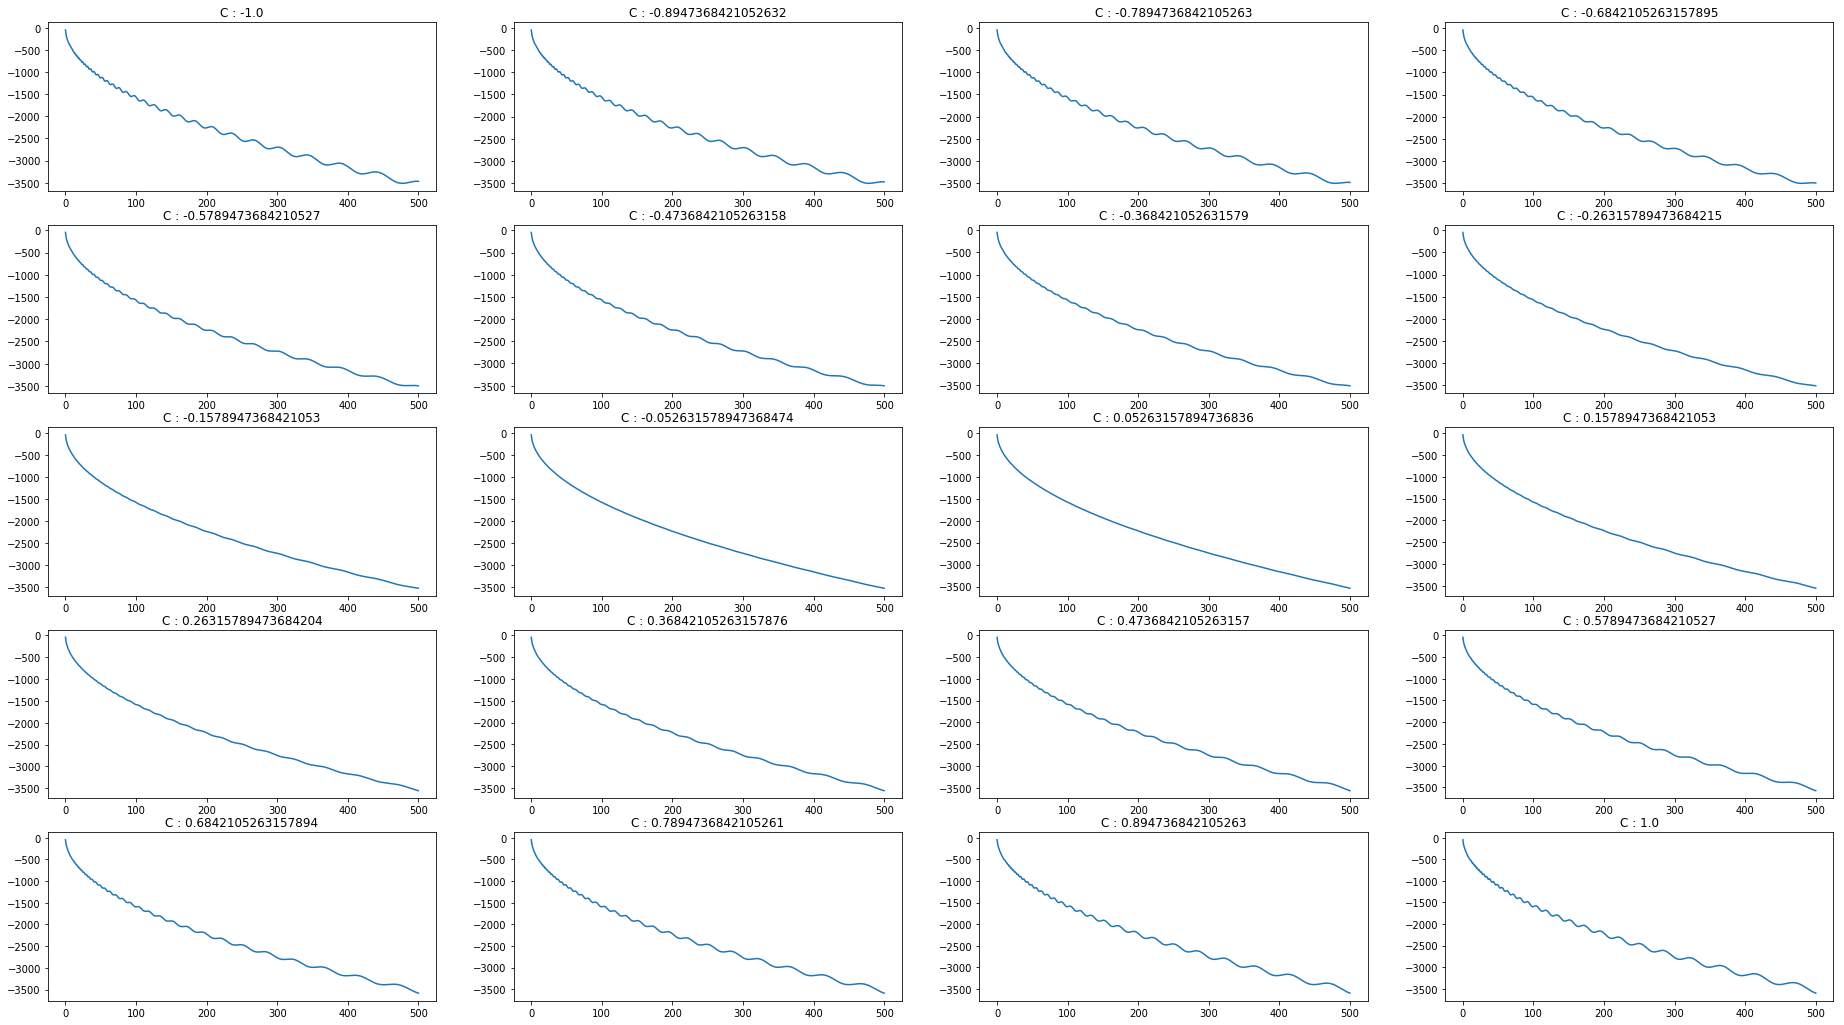

In [107]:
nrows, ncols = 5, 4
n_pic = 1
plt.figure(figsize=(32,18))
plt.subplot(nrows, ncols, n_pic)
for C in Cd:
    oC, mC, BC, tauC = np.mean(od), np.mean(md), np.mean(Bd), np.mean(taud)
    yd = y(xd, oC, mC, A, BC, C, tauC)
    plt.subplot(nrows, ncols, n_pic)
    plt.title("C : " + str(C))
    plt.plot(xd, yd)
    n_pic += 1 

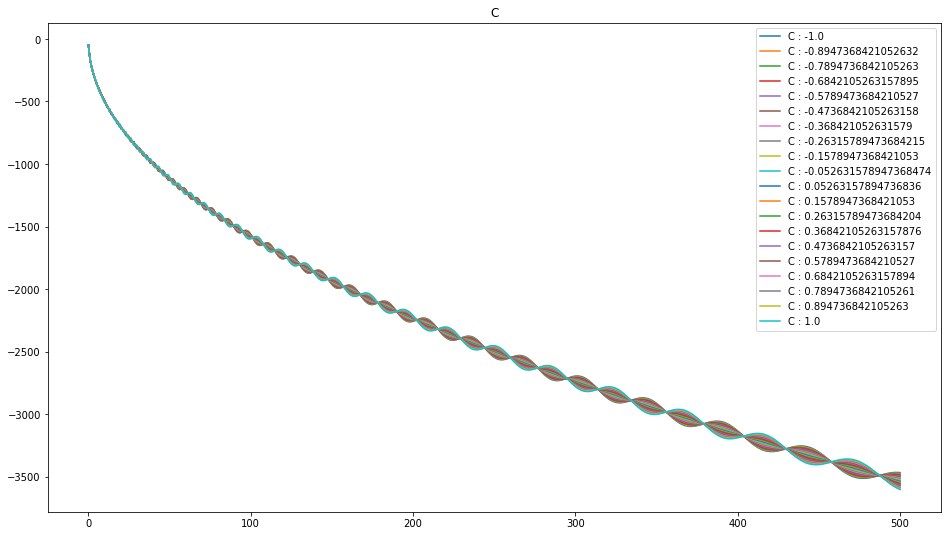

In [108]:
plt.figure(figsize=(16,9))
plt.title("C")
for C in Cd:
    oC, mC, BC, tauC = np.mean(od), np.mean(md), np.mean(Bd), np.mean(taud)
    yd = y(xd, oC, mC, A, BC, C, tauC)
    plt.plot(xd, yd, label='C : '+str(C))
# plt.xlim(0,50)
# plt.ylim(-2000,0)
plt.legend()

C:\Users\sarac\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


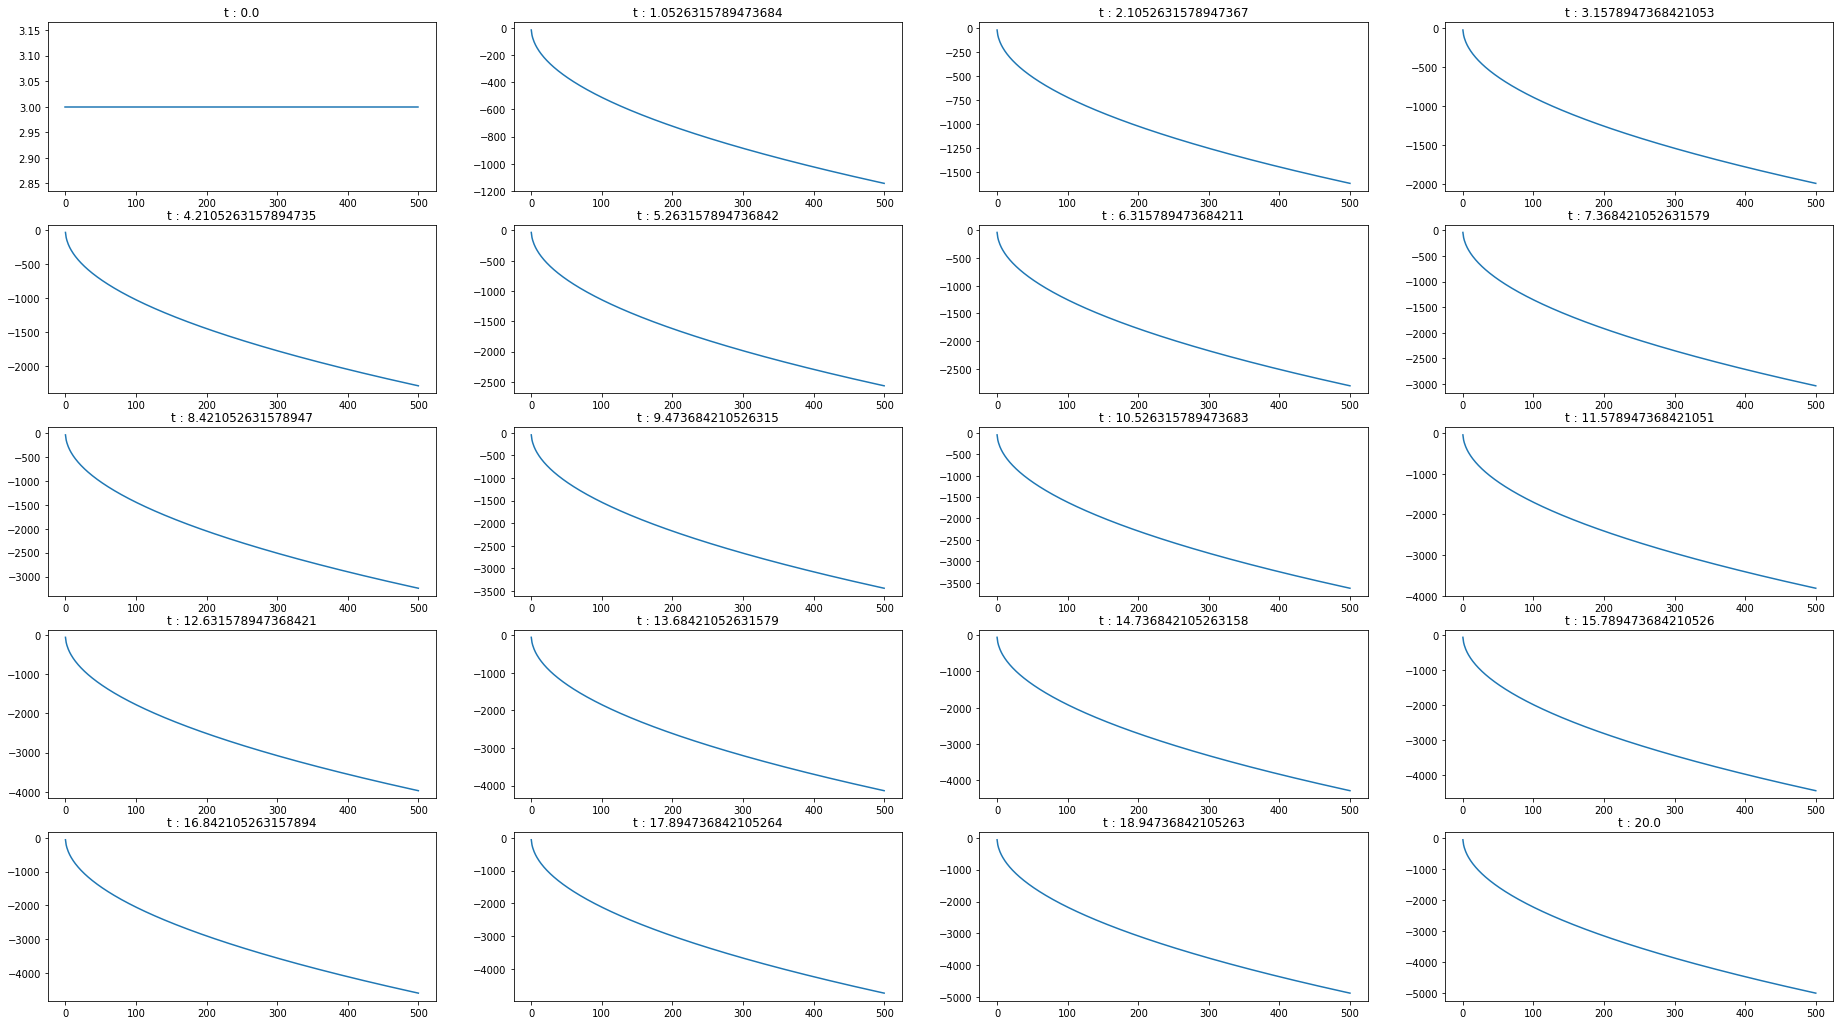

In [110]:
nrows, ncols = 5, 4
n_pic = 1
plt.figure(figsize=(32,18))
plt.subplot(nrows, ncols, n_pic)
for t in taud:
    ot, mt, Bt, Ct = np.mean(od), np.mean(md), np.mean(Bd), np.mean(Cd)
    yd = y(xd, ot, mt, A, Bt, Ct, t)
    plt.subplot(nrows, ncols, n_pic)
    plt.title("t : " + str(t))
    plt.plot(xd, yd)
    n_pic += 1 

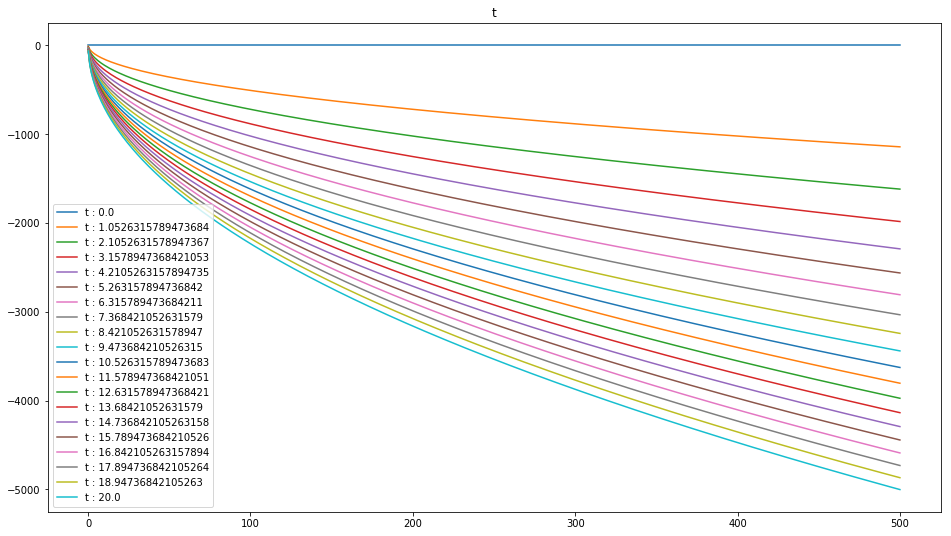

In [112]:
plt.figure(figsize=(16,9))
plt.title("t")
for t in taud:
    ot, mt, Bt, Ct = np.mean(od), np.mean(md), np.mean(Bd), np.mean(Cd)
    yd = y(xd, ot, mt, A, Bt, Ct, t)
    plt.plot(xd, yd, label='t : '+str(t))
# plt.xlim(0,50)
# plt.ylim(-2000,0)
plt.legend()